In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/iris.csv')

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
attr1 = 'petal.length'
attr2 = 'petal.width'

In [5]:
df = df[[attr1, attr2, 'variety']]

In [6]:
X = df[[attr1, attr2]]
y = df['variety']

In [7]:
X.head()

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
y_np = np.array(y)
y_np.shape

(150,)

In [9]:
variety = df['variety'].unique()
n_classes = len(variety)

Pravimo rečnik koji vrši mapiranje imena klase u njen redni broj.
Često je u praksi zgodno konstrusati i inverzni rečnik, koji za redni broj
vraća nazad koja je klasa u pitanju.

In [10]:
mapping_name_to_i = dict(zip(variety, range(n_classes)))
mapping_i_to_name = dict(zip(range(n_classes), variety))

In [11]:
mapping_name_to_i

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

In [12]:
mapping_i_to_name

{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

In [13]:
y = y.replace(mapping_name_to_i)

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int64

## Algoritam KNN
Konstruišemo klasifikator *K najbližih suseda* (eng. K Nearest Neighbours) koji će bit iskorišćen da se izvrši
klasifikacija sa ciljnom promenljivom `variety`.

Postavićemo mu parametar `weights='distance'` kako bi klasifikator otežao susede njihovim rastojanjima,
i kako bi veći uticaj na klasifikaciju imali bliži susedi u odnosu na dalje susede. Više o parametru
u dokumentaciji za klasu.

Više o klasifikatoru [ovde](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

<img src='knn.png'>

In [15]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

Delimo podatake na dva podskupa, skup za obučavanje i skup za testiranje.

Na skupu za obučavanje ćemo obučavati model, a na skupu za testiranje dati finalnu ocenu modela.

Postavićemo parametar `stratify=y` kako bi algoritam izvršio stratifikaciju po promenljivoj `y` i očuvao
raspodelo ciljne promenljive i u skupu za obučavanje i u skupu za testiranje.

Parametar `random_state` se postavlja kako bi podela u svakom pokretanju ove Jupyter sveske bila ista.

In [16]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)

Vršimo obučavanje modela. Praktično svaki algoritam koji nudi bibioteka `scikit learn` ima metod `fit` kojim
se vrši obučavanje modela.

In [17]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## Mere kvaliteta klasifikacije

Matrica konfuzije nam omogućava da steknemo uvid u to kako je koje klase je algoritam
klasifikovao. Ukoliko klasifikator negde greši, matrica konfuzije nam pomaže da uočimo
koje su to klase koje klasifikator najčešće meša.

Razmislimo ovde intuitivno šta očekujemo da su greške. Ako se prisetimo prošlog primera
gde smo nacrtali podatke, uočićemo da su klase `Versicolor` i `Virginica` vrlo blizu
za atributa koje smo odabrali u jednom delu slike. Vrlo je moguće da će se ispostaviti
da greške koje klasifikator prave su upravo između ove dve klase za podatke koje su u
toj kritičnoj zoni.

| Stvarno/predvidjeno 	|        Pozitivno       	|        Negativno       	|
|:-------------------:	|:----------------------:	|:----------------------:	|
|       Pozitivno     	| stvarno pozitivno (TP) 	|  lažno negativno (FN)  	|
|      Negativno      	|  lažno pozitivno (FP)  	| stvarno negativno (TN) 	|

Tačnost (eng. accuracy) se definiše kao:
$$
Acc = \frac{TP + TN}{TP + TN + FP + FN}
$$

Preciznost (eng. precision) se definiše kao:
$$
Precision = \frac{TP}{TP + FP}
$$

Odziv (eng. recall) se definiše kao:
$$
Recall = \frac{TP}{TP + FN}
$$

Ove dve mere (preciznost i odziv) se često koriste zajedno u meri koja se naziva F1 mera
koja predstavlja njihovu harmonijsku sredinu.
$$
F_1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

Metod `score` nam izračunava meru *tačnost*, odnosno *accuracy*.

In [18]:
clf.score(X_train, y_train)

0.9904761904761905

In [19]:
clf.score(X_test, y_test)

0.9333333333333333

Većina algoritama u biblioteci `scikit learn` nudi metod `predict` koji prihvata
skup podataka nad kojim je potrebno izvršiti predikciju, a kao povratna vrednost
se vraća vektor predikcija za prosleđeni skup podataka.

In [20]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Meru tačnost možemo izračunati i na sledeći način.

In [21]:
metrics.accuracy_score(y_train, y_train_pred)

0.9904761904761905

In [22]:
metrics.accuracy_score(y_test, y_test_pred)

0.9333333333333333

Matrica konfuzije se izračunava koristeći funkciju `confusion_matrix` iz modula `metrics`.

In [23]:
conf = metrics.confusion_matrix(y_test, y_test_pred)
conf

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]])

Matrica konfuzije se može lepo vizuelizovati koristeci modul `matplotlib`.
U praksi se najčešće ovako i prikazuje, pogotovo u situacijama kada postoji
više desetina klasa.

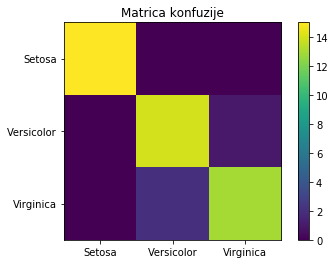

In [24]:
plt.imshow(conf)
plt.colorbar()
plt.title('Matrica konfuzije')
plt.xticks(range(n_classes), mapping_name_to_i.keys())
plt.yticks(range(n_classes), mapping_name_to_i.keys())
plt.show()

Uočimo da klasifikator zaista ume da pogreši povremeno za klase `Versicolor` i `Virginica`.

<img src='thuglife.png'>

Prethodno navedene mere se mogu sumarno dobiti koristeći funkciju `classification_report` iz modula `metrics`.

In [25]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

